In [6]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [86]:
def canny_edge(image):
    # Apply the white top-hat transformation
    neg_image = cv2.bitwise_not(image)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
    top_hat = cv2.morphologyEx(neg_image, cv2.MORPH_TOPHAT, kernel)

    # Subtract the top-hat result from the original image
    subtracted = cv2.subtract(image, top_hat)

    # Remove the noise and keep the edges using a canny edge detector
    edges = cv2.Canny(subtracted, 100, 230)

    # Clip the result to the range [0, 255]
    clipped = np.clip(edges, 0, 255).astype(np.uint8)

    # Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(clipped)

    return enhanced_image

In [99]:
def top_hat_transform(image):
    # Apply the white top-hat transformation
    neg_image = cv2.bitwise_not(image)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
    top_hat = cv2.morphologyEx(neg_image, cv2.MORPH_TOPHAT, kernel)

    # Subtract the top-hat result from the original image
    subtracted = cv2.subtract(image, top_hat)

    # Further reduce noise using a Bilateral Filter
    denoised = cv2.bilateralFilter(subtracted, 5, 75, 75)

    # Clip the result to the range [0, 255]
    clipped = np.clip(denoised, 0, 255).astype(np.uint8)

    # Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(clipped)

    return enhanced_image

In [87]:
def test_preprocess(transform, img_idx = None):
    if img_idx is None:
        img_idx = np.random.randint(1, 200)

    original_img_path = f'data/arcade/syntax/val/images/{img_idx}.png'

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    original_img = cv2.imread(original_img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    processed_img = transform(original_img)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image')

    plt.show()

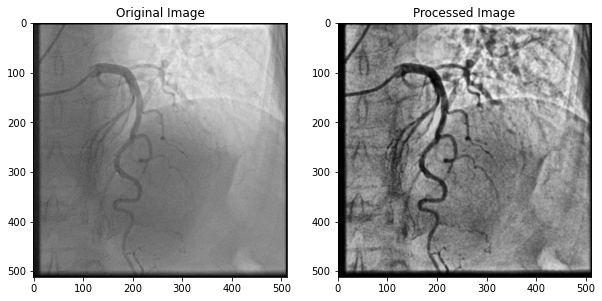

In [105]:
test_preprocess(canny_edge)